# AM10IM - Introduction to Matlab

## Lecture Challenge 5 Solutions

Please have a go at the challenge before looking at the solutions. You will learn more having done it yourself rather than looking at how I have solved it.

__Challenge 1__: Generate 1000 random points in that square. Both $x$ and $y$ coordinates must be random and lie between $\pm 1$. You might want to think about using the function __rand__ which generates a random number between $0$ and $1$

The rand function will generate uniformly distributed numbers between $0$ and $1$. We somehow want it between $\pm 1$. We can treat __rand__ as we treat other numbers, i.e. we can perform normal mathematical operations on it:

In [1]:
rand+1

ans =  1.8864


In [2]:
100*rand

ans =  64.536


The first line of code will generate a random number between $1$ and $2$ and the second a random number between $0$ and $100$. When performing mathematical operations on __rand__ it is best to think about what will happen to the boundaries $0$ and $1$.

To get a random number between $\pm 1$ we need to double the interval and then shift it:

In [19]:
2*rand-1

ans = -0.18622


And so to generate 1000 points within the square, we need both $x$ and $y$ coordinates to be between $\pm 1$:

In [67]:
for i = 1:1000
    x(i) = 2*rand - 1;
    y(i) = 2*rand - 1;
end
x(1:7)
y(1:7) % Just printing out a few values to see that they are indeed different random numbers

ans =

   0.800246  -0.150977  -0.720089  -0.032409   0.471483  -0.310969  -0.523326

ans =

  -0.176412   0.284940   0.977547  -0.906217  -0.789585   0.740025  -0.021433



Notice that every time we use __rand__ we generate a new random number.

So now each $\left(x(i),y(i)\right)$ corresponds to a point in the square.

__Challenge 2__: Using the knowledge that a point lies inside the circle __if__ its $x$ and $y$ coordinates obey the following inequality:

$$
x^2 + y^2 < 1
$$

and the ratio shown above, find an estimate of $\pi$.

__Hint__: The points you have generated can only be either inside or outside of the circle.

We have generated all the points we need, we now want to use the ratio:

$$
4\cdot\frac{N_{inside}}{N_{Total}} \approx \pi
$$

A single point can either be __inside__ or __outside__ the circle. A coordinate is inside if its $x$ and $y$ coordinates obey the above inequality. This lends itself to an if statement! If this condition is met, we can add one to the count of the number inside the circle:

In [46]:
%{
This will generate our estimate of pi. Once we generate a point we check if it is inside the circle using:

x(i).^2 + y(i).^2 < 1

If it is inside we add one to the number 'inside'. And so 'inside' will be the total number inside the circle

n - number of generated points
x - vector containing the x coordinate of all the points
y - vector containing the y coordinate of all the points

inside - will count the number of points inside the circle
estPi - Our estimate of pi using the ratio shown above.
%}

n = 1000;
inside = 0;                 %We are using inside = inside+1 below so it must be initialised to zero before the loop.

for i = 1:n                 %We perform the below operation n times
    x(i) = 2.*rand-1;
    y(i) = 2.*rand-1;       %We randomly generate an x and y coordinate inside the square
    
    if (x(i).^2 + y(i).^2 < 1)    % If the point is INSIDE the circle perform the following
        inside = inside + 1;
    end
end

%{
After this for loop the variable 'inside' will have counted the number of points inside the circle.
%}

estPi = 4.*inside./n;    % We calculate the ratio and get an estimate of pi
fprintf('The estimate to pi with %.0f points is: %.3f \n',n,estPi)

The estimate to pi with 1000 points is: 3.136 


__Challenge 2+__: With your points can you generate a plot like the above?

We don't need to ammend much to generate a plot that is shown in the lecture challenge. Every time we generate a point we want to plot it, but we must give it a different colour if it is inside or outside the circle. We can plot each point individually and use the __hold on__ function to keep plotting the points on the same figure:

The estimate to pi with 1000 points is: 3.172 


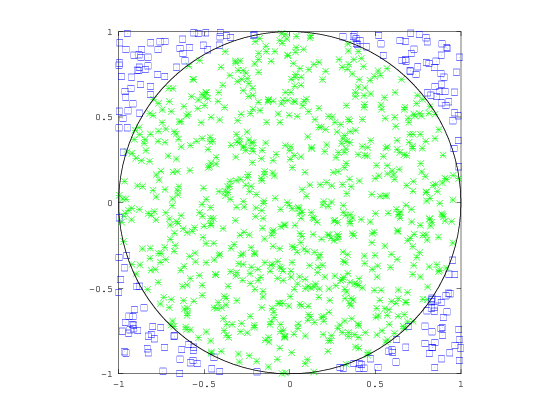

In [56]:
n = 1000;
inside = 0;                 

for i = 1:n                 
    x(i) = 2.*rand-1;
    y(i) = 2.*rand-1;       
    
    if (x(i).^2 + y(i).^2 < 1)    % If the point is INSIDE the circle perform the following
        inside = inside + 1;
        plot(x(i),y(i),'*g')      %Plot the single point as a green star
        hold on    
%{
Hold on so that the next point will be put on the same figure
Otherwise it will wipe the previous figure
%}
        else                    %If the point is not inside the circle perform the following
        plot(x(i),y(i),'sb')    %plot the single point as a blue square
        hold on                 %Hold on so that the next point will be put on the same figure
    end
end
%{
The hold ons make sure that when the for loop loops around again the next point (inside or outside) is plotted
on the same figure
%}

axis equal        % Makes sure that the figure doesn't look oblong (try it without this line)
axis([-1 1 -1 1]) % Makes sure that Matlab won't plot white space outside the square

%{
If we want to see the boundary between inside and outside the circle we plot on the same figure
(we still have a hold on from the last point) xa, ya which will plot the circle:
%}

theta = linspace(0,2*pi); % vector of evenly spaced numbers between 0 and 2pi
xa = cos(theta);          % The x coordinate
ya = sin(theta);          % The y coordinate

plot(xa,ya,'k','Linewidth',2)     %Plots the circle in black with a thick line to illustrate the boundary

  
fprintf('The estimate to pi with %.0f points is: %.3f \n',n,estPi)

This plot dosen't quite look like the one generated in the lecture challenge because the lecture challenge plot used 10000 points rather than 1000.

__Challenge 3__: Maybe you have tried larger numbers and seen that it doesn't estimate $\pi$ very well, in fact I find that even with 10000 points the estimate can only really get to $3.1$. What might be better is finding __many__ ratios and find the average ratio. Generate 100 estimates of $\pi$ by performing your for loop above 100 times and find the average and its standard deviation. You may find the functions mean(x) and std(x) for the average and standard deviation of a vector x helpful

Plot the estimates in a histogram. (In these notebooks use the function hist(x) and in Matlab use the function histogram(x) to plot a histogram of the vector x)

Be wary that it may take your computer a couple of minutes to perform $100\times1000$ tasks.

We want to be able to run our code 100 times, __store__ the estimate of pi for each case, calculate its average and standard deviation and plot a histogram of pi's. This means we are going to have to put a lot of our code inside another for loop that will loop 100 times.

After 100 estimates of pi using 1000 points the average is 3.147560 with std 0.052082 


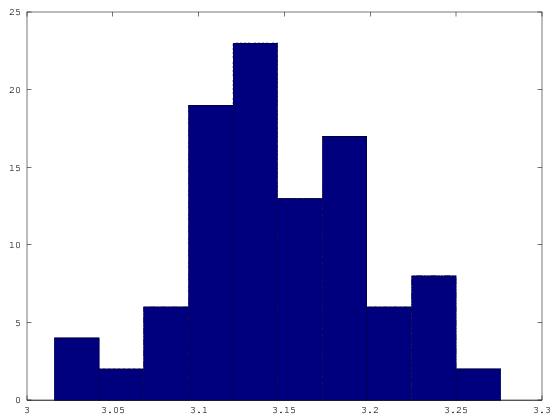

In [70]:
n = 1000;
m = 100;    % m is the number of estimates of pi we will get.
estPiv = zeros(m,1); %This will contain our estimates of Pi, initialised outside the for loop
for j = 1:m
    inside = 0;
%{
    We have to reset the count each new time we run our previous code, so inside the new for loop
    but outside the original loop we set inside = 0. What would happen if we set it
    outside this for loop?
%}
    
%   Here is our original code from above, generating 1000 points and counting those inside the circle
%------------------------
    for i = 1:n                 
        x(i) = 2.*rand-1;
        y(i) = 2.*rand-1;   
    
        if (x(i).^2 + y(i).^2 < 1) 
            inside = inside + 1;
        end
    end
%------------------------
    estPiv(j) = 4.*inside./n; 
%    estPiv (was estPi) is now a vector and we calculate the j'th element (why not i'th) in this loop.   
end

%Outside this loop estPi has 100 estimates of pi which we can now investigate

avPi = mean(estPiv); %calculates the mean of estPiv
stPi = std(estPiv);  %calculates the standard deviation of estPiv

fprintf('After %.0f estimates of pi using %.0f points the average is %.6f with std %.6f \n',m,n,avPi,stPi)

hist(estPiv) %Plots the histogram, if you are using matlab use histogram(x) for the same operation


With more estimates (larger m) we will get a histogram that will look more like the normal distribution, if we use more points per estimate (larger n) our average will get more accurate and the standard deviation will get smaller.